In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import datetime as dt

In [2]:
# Reading in the data
merged_df = pd.read_sas("merged_df.sas7bdat", encoding="ISO-8859-1")
print(merged_df)

         permno    yyyymm  monthid ticker                    conm   gvkey  \
0       10026.0  198601.0     73.0    NaN                     NaN     NaN   
1       10026.0  198602.0     74.0    NaN                     NaN     NaN   
2       10026.0  198603.0     75.0   JJSF  J & J SNACK FOODS CORP  012825   
3       10026.0  198604.0     76.0   JJSF  J & J SNACK FOODS CORP  012825   
4       10026.0  198605.0     77.0   JJSF  J & J SNACK FOODS CORP  012825   
...         ...       ...      ...    ...                     ...     ...   
440715  93429.0  201908.0    476.0    NaN                     NaN     NaN   
440716  93429.0  201909.0    477.0    NaN                     NaN     NaN   
440717  93429.0  201910.0    478.0    NaN                     NaN     NaN   
440718  93429.0  201911.0    479.0    NaN                     NaN     NaN   
440719  93429.0  201912.0    480.0    NaN                     NaN     NaN   

            cusip   naics   gsubind        IM  ...    ret_f3    ret_f4  \
0

In [3]:
merged_df['permno'] = merged_df['permno'].astype(np.int64)

In [4]:
# defines a list of factor names and return names
factors = list(merged_df.columns[9:59])
ret_cols = list(merged_df.columns[61:62]) + list(merged_df.columns[63:])
#print(factors)
#print(ret_cols)

In [5]:
# Summary statistics on each factor
merged_df[factors].describe()

,IM,range_20,log_vol_dollar_20,range_120,log_vol_dollar_120,xret_5,xret_10,xret_20,xret_indsize_20,xret_indsize_std20,...,sue_NI,BM,AM,EP,SP,roe_q,roa_q,Cto,pe_ttm,lag_log_size
count,396810.000000,393298.000000,393180.000000,390503.000000,390392.000000,393215.000000,393587.000000,393306.000000,393299.000000,393297.000000,...,376216.000000,389286.000000,390956.000000,389400.000000,389195.000000,385942.000000,387532.000000,387447.000000,394890.000000,402016.000000
mean,0.068380,0.030148,15.487962,0.030259,15.475784,0.002672,0.003545,0.006454,0.006295,0.019392,...,0.462312,0.570775,2.319107,0.035785,1.475961,0.031425,0.013197,0.268396,46.256538,7.255068
std,0.182297,0.019583,2.533719,0.017761,2.512443,0.048088,0.065915,0.093411,0.090055,0.012567,...,1.451602,0.722488,4.896750,0.266631,2.490107,0.114974,0.029334,0.206346,63.544114,1.929096
min,-0.855087,0.002885,5.606914,0.004878,6.317937,-0.437090,-0.633731,-0.814414,-0.747931,0.003121,...,-8.915694,-3.074103,0.031183,-14.684321,0.000000,-2.280287,-0.482401,0.000000,0.246328,-2.344710
25%,-0.027020,0.018365,13.969380,0.019253,13.955039,-0.020289,-0.029413,-0.042326,-0.039820,0.011078,...,-0.325806,0.271764,0.583538,0.031354,0.419790,0.016441,0.003917,0.116593,13.074188,6.025008
50%,0.067608,0.025156,15.771169,0.025738,15.750334,0.000908,0.001743,0.004134,0.004007,0.016085,...,0.276522,0.456722,1.094925,0.053525,0.828666,0.033642,0.012920,0.231974,18.865530,7.220599
75%,0.150966,0.035846,17.318367,0.035844,17.292326,0.023814,0.034828,0.052491,0.050083,0.023855,...,1.222897,0.709669,2.230528,0.076954,1.609642,0.052338,0.024307,0.365988,33.314279,8.484460
max,2.318851,0.666667,20.569824,0.435457,20.424665,0.578354,0.608830,1.096811,0.943398,0.173686,...,7.723782,46.005236,307.931752,4.161720,150.968812,2.078245,0.202417,1.557880,200.000000,13.987329


In [6]:
# Summary statistics on each return
merged_df[ret_cols].describe()

,RET,ret_f1,ret_f2,ret_f3,ret_f4,ret_f5,ret_f6,ret_f7,ret_f8,ret_f9,ret_f10,ret_f11,ret_f12
count,435167.000000,436174.000000,437125.000000,437050.000000,436977.000000,436904.000000,436832.000000,436758.000000,436684.000000,436611.000000,436538.000000,436462.000000,436385.000000
mean,0.015274,0.015056,0.014738,0.014053,0.014513,0.014566,0.014594,0.014594,0.014698,0.014467,0.014439,0.014913,0.015110
std,0.119022,0.118972,0.119080,0.119870,0.120752,0.120696,0.120570,0.120530,0.120484,0.120390,0.120282,0.120726,0.120666
min,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327
25%,-0.041947,-0.042146,-0.042553,-0.042945,-0.042762,-0.042725,-0.042666,-0.042636,-0.042541,-0.042770,-0.042802,-0.042623,-0.042410
50%,0.011732,0.011583,0.011361,0.011172,0.011354,0.011384,0.011401,0.011421,0.011511,0.011325,0.011299,0.011542,0.011735
75%,0.066667,0.066427,0.066257,0.066061,0.066446,0.066499,0.066506,0.066468,0.066532,0.066286,0.066240,0.066667,0.066812
max,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050


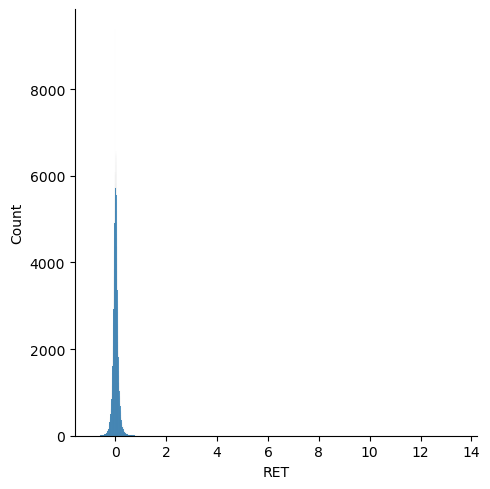

In [7]:
# Selected factors/returns plotted as illustration
sns.displot(x= merged_df.RET)

In [8]:
sns.displot(x= merged_df.xret_5)

In [9]:
# Checking for columns with >= 50% NaN values.
nan_cols = []
for column in factors:
    if merged_df[column].isnull().sum() >= (merged_df.shape[0]/2):
        nan_cols.append(column)
        
print(nan_cols)

[]


In [10]:
# NEW IMPUTE METHOD
merged_df.dropna(subset= ['ticker', 'conm', 'gvkey', 'cusip', 'naics', 'gsubind'], inplace = True)

# .groupby crates a Pandas groupby object, where I've grouped the rows by their permno
#grouped_med = merged_df.groupby(by= 'permno')
grouped_med = merged_df.groupby(by= 'monthid')
# the lambda function gets the median per group in the groupby object, and fills the NaN values with the median per group
imputed_grouped = grouped_med.transform(lambda y: y.fillna(y.median()))

# This line assigns the values of the medians 
merged_df = merged_df.assign(**imputed_grouped.to_dict(orient='series'))

# Some NAN VALUES STILL IN DATA, DROPNA TO TAKE THEM OUT  - Figuring out what's going on with Python difficult.
# Suggest using other programs such as SAS if issue is severe
merged_df.dropna(inplace = True)
merged_df.describe()

C:\Users\Alan\AppData\Local\Temp\ipykernel_15900\2512134717.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  imputed_grouped = grouped_med.transform(lambda y: y.fillna(y.median()))
C:\Users\Alan\AppData\Local\Temp\ipykernel_15900\2512134717.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  imputed_grouped = grouped_med.transform(lambda y: y.fillna(y.median()))


,permno,yyyymm,monthid,IM,range_20,log_vol_dollar_20,range_120,log_vol_dollar_120,xret_5,xret_10,...,ret_f3,ret_f4,ret_f5,ret_f6,ret_f7,ret_f8,ret_f9,ret_f10,ret_f11,ret_f12
count,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,...,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000,401588.000000
mean,54647.707636,200369.825087,290.141292,0.068616,0.030034,15.470445,0.030115,15.451499,0.002630,0.003523,...,0.013836,0.014331,0.014501,0.014503,0.014629,0.014610,0.014423,0.014454,0.015019,0.015187
std,28231.390568,1066.151245,127.962416,0.181949,0.019418,2.516489,0.017564,2.491919,0.047572,0.065236,...,0.121397,0.122263,0.122248,0.122140,0.122026,0.121869,0.121729,0.121651,0.122201,0.122071
min,10026.000000,198004.000000,4.000000,-0.855087,0.002885,5.606914,0.004878,6.317937,-0.437090,-0.633731,...,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327,-0.878327
25%,24985.000000,199601.000000,193.000000,-0.026750,0.018475,13.925456,0.019389,13.898759,-0.019647,-0.028474,...,-0.044304,-0.044076,-0.043864,-0.043836,-0.043574,-0.043478,-0.043796,-0.043753,-0.043478,-0.043238
50%,59774.000000,200506.000000,306.000000,0.068171,0.025015,15.740564,0.025542,15.711054,0.000817,0.001666,...,0.010980,0.011243,0.011407,0.011375,0.011532,0.011561,0.011366,0.011372,0.011652,0.011834
75%,80362.000000,201305.000000,401.000000,0.150966,0.035602,17.280390,0.035549,17.240703,0.023129,0.033952,...,0.066768,0.067217,0.067340,0.067255,0.067308,0.067182,0.067033,0.067039,0.067563,0.067647
max,93429.000000,201912.000000,480.000000,2.318851,0.666667,20.569824,0.435457,20.424665,0.578354,0.608830,...,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050,13.495050


In [11]:
# The np.corrcoeff doesn't work with NaN values. So I've done this after imputing. 
# The alternate strategy is to convert all NaN values to 0, do the boxplot, and then 
# impute afterwards. I'm not sure which one is preferable.

#np.corrcoef(x= merged_df.xret_5, y= merged_df.RET)
coeff_lst = []
for column in factors:
    coeff_lst.append(np.corrcoef(x= merged_df[column], y= merged_df.RET)[0,1])
sns.boxplot(x= coeff_lst)

<AxesSubplot:xlabel='xret_5', ylabel='Count'>

In [12]:
# Boxplot of a feature (range_20), showing the outliers
sns.boxplot(x= merged_df.range_20)

<AxesSubplot:xlabel='range_20', ylabel='Count'>

In [13]:
# Winsorizing factors--should winsorize the variables by quarter
for column in factors:
    lower = merged_df[column].quantile(0.01)
    upper = merged_df[column].quantile(0.99)
    merged_df[column].clip(lower, upper, inplace= True)

In [14]:
# Winsorizing returns -- in most cases you shouldn't winsorize returns as this is the variable of prediction 
#for column in ret_cols:
#    lower = merged_df[column].quantile(0.01)
#    upper = merged_df[column].quantile(0.99)
#    merged_df[column].clip(lower, upper, inplace= True)

In [15]:
# The next few cells still throw up the same warning as before, I've suppressed it here as the old impute
# method is commented out
pd.set_option("mode.chained_assignment", None)

# Creates a correlation matrix to see which factors are correlated with one another
corr_matrix = merged_df[factors].corr().abs()

# creates an upper triangular matrix of the corr matrix (since it's symmetric about the diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

# gets the columns that fit the criteria to be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

# drops those columns
merged_df.drop(merged_df[to_drop], axis=1, inplace= True)

['range_120', 'log_vol_dollar_120', 'xret_indsize_20', 'xret_indsize_std20', 'xret_indsize_120', 'xret_indsize_std120', 'deviation_pct20', 'RSI_20', 'deviation_pct120', 'RSI_120', 'IV_capm', 'mdr', 'beta_5y', 'profitability', 'sales_g_ttm', 'roa_q', 'lag_log_size']


In [16]:
# Scaling the factors

# creating a new list of factors after dropping the highly correlated ones
new_factors = [columns for columns in factors if columns not in to_drop]

# Getting their values into a NumPy array
values = merged_df[new_factors].values

# Scaling the values 
# here the code scale the factor values using the full sample, just for illustration purposes. It would be the best to scale the 
# values by month
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(values)

# Assigns the new values back into the DataFrame
merged_df[new_factors] = scaled_values

In [17]:
# Provides a 80%, 10%, 10% split. Can be adjusted by changing the numerical 
# coefficients in [int(.8*len(merged_df)), int(.9*len(merged_df))]

# merged_df.sample(frac=1, random_state=42) shuffles the order

train, validate, test = \
                        np.split(merged_df.sample(frac=1, random_state=42), 
                        [int(.8*len(merged_df)), int(.9*len(merged_df))])

In [18]:
# drop the column 'conm' to reduce the size of data
merged_df = merged_df.drop('conm', 1) 
print(merged_df)

        permno    yyyymm  monthid ticker   gvkey      cusip   naics   gsubind  \
2        10026  198603.0     75.0   JJSF  012825  466032109  311812  30202030   
3        10026  198604.0     76.0   JJSF  012825  466032109  311812  30202030   
4        10026  198605.0     77.0   JJSF  012825  466032109  311812  30202030   
5        10026  198606.0     78.0   JJSF  012825  466032109  311812  30202030   
6        10026  198607.0     79.0   JJSF  012825  466032109  311812  30202030   
...        ...       ...      ...    ...     ...        ...     ...       ...   
440697   93429  201802.0    458.0   CBOE  184500  12503M108  523210  40203040   
440698   93429  201803.0    459.0   CBOE  184500  12503M108  523210  40203040   
440699   93429  201804.0    460.0   CBOE  184500  12503M108  523210  40203040   
440700   93429  201805.0    461.0   CBOE  184500  12503M108  523210  40203040   
440701   93429  201806.0    462.0   CBOE  184500  12503M108  523210  40203040   

              IM  range_20 

C:\Users\Alan\AppData\Local\Temp\ipykernel_15900\1402332328.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_df = merged_df.drop('conm', 1)


In [19]:
merged_df.to_csv("merged_final.csv", index = False)